# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
exp_dir = "datasets/infuluenza/LSTM/"

df = pd.read_csv(data_path)

/home/is/daiki-ko/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/is/daiki-ko/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286


In [3]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [4]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

In [5]:
columns = ["Flucases","Tempave", "Rh", "Holiday"]

all_data = df_tokyo[columns]

In [6]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [7]:
train_df.head()

,Flucases,Tempave,Rh,Holiday
12480,818,9.528571,50.571429,2
12481,1167,8.642857,61.142857,3
12482,2562,6.828571,56.000000,2
12483,3781,5.342857,42.000000,2
12484,3903,7.214286,38.714286,2


In [8]:
test_df.head()

,Flucases,Tempave,Rh,Holiday
13260,3809,5.357143,47.142857,3
13261,9892,6.285714,38.285714,2
13262,8198,5.628571,53.857143,3
13263,9625,6.771429,63.714286,2
13264,7844,4.228571,49.000000,2


trainとtestのdfを作る

In [9]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh"]]
test_xs_df = test_df["Holiday"]

In [10]:
seq_length = 1

# Dataset and DataLoader

In [11]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [12]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
data_dir = "datasets/infuluenza/vecLSTMx/"
exp_dir = "datasets/infuluenza/LSTM/"

In [13]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(data_dir + 'std_scaler.joblib')

In [14]:
train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [15]:
trn_xs_tensor = torch.Tensor(train_Xs[:,:,0:1])
trn_ys_tensor = torch.Tensor(train_ys[:,:,0:1])

val_xs_tensor = torch.Tensor(val_Xs[:,:,0:1])
val_ys_tensor = torch.Tensor(val_ys[:,:,0:1])

In [16]:
trn_xs_tensor.shape, trn_ys_tensor.shape, val_xs_tensor.shape, val_ys_tensor.shape

(torch.Size([623, 1, 1]),
 torch.Size([623, 1, 1]),
 torch.Size([156, 1, 1]),
 torch.Size([156, 1, 1]))

In [17]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [18]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
1 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
2 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
3 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
4 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
5 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
6 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
7 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
8 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
9 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
10 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
11 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
12 torch.Size([23, 1, 1]) torch.Size([23, 1, 1])


In [19]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
1 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
2 torch.Size([50, 1, 1]) torch.Size([50, 1, 1])
3 torch.Size([6, 1, 1]) torch.Size([6, 1, 1])


# LSTM model

In [20]:
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size=32, output_size=1, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
 
        h = self.relu(self.fc1(outs))
        y = self.relu(self.fc2(h))

        return y

In [21]:
model = LSTM(input_size = 1, hidden_size = 16, output_size = 1, num_layers = 1)

/home/is/daiki-ko/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [22]:
batch_0x = list(trn_loader)[0][0]

In [23]:
batch_0x.shape

torch.Size([50, 1, 1])

In [24]:
preds = model(batch_0x)

In [25]:
preds.shape

torch.Size([50, 1])

## Train

In [26]:
model.cuda()

LSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(1, 16, dropout=0.2)
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [27]:
criterion = nn.MSELoss(reduction='mean').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [28]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()

            preds = model(inputs)
            true_y = trues.reshape(preds.shape)
            loss = criterion(preds, true_y)
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [29]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        optimizer.zero_grad()
        
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        loss = criterion(preds, true_y)
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.8963771611452103 Val loss:  0.3381182663142681
epoch:  1 Train loss:  0.8346700146794319 Val loss:  0.3262292854487896
epoch:  2 Train loss:  0.7867804719851568 Val loss:  0.3164645079523325
epoch:  3 Train loss:  0.7774789860615363 Val loss:  0.28876785188913345
epoch:  4 Train loss:  0.6670258526618664 Val loss:  0.2536738160997629
epoch:  5 Train loss:  0.5703406001512821 Val loss:  0.20410017482936382
epoch:  6 Train loss:  0.4516340901072209 Val loss:  0.15446895733475685
epoch:  7 Train loss:  0.3563319430328332 Val loss:  0.10618436709046364
epoch:  8 Train loss:  0.20013718622235152 Val loss:  0.0785239078104496
epoch:  9 Train loss:  0.12017155567613932 Val loss:  0.08943532593548298
epoch:  10 Train loss:  0.11870727157936646 Val loss:  0.09656337415799499
epoch:  11 Train loss:  0.11780710246127385 Val loss:  0.09039864828810096
epoch:  12 Train loss:  0.12596867520075578 Val loss:  0.08884623274207115
epoch:  13 Train loss:  0.11034879675851418 Val 

epoch:  113 Train loss:  0.09880858301543273 Val loss:  0.08352678036317229
epoch:  114 Train loss:  0.09862096235156059 Val loss:  0.08799646934494376
epoch:  115 Train loss:  0.10041573500403991 Val loss:  0.08720533084124327
epoch:  116 Train loss:  0.10055093983044991 Val loss:  0.08791937166824937
epoch:  117 Train loss:  0.09645158608103745 Val loss:  0.08659058809280396
epoch:  118 Train loss:  0.1034175492823124 Val loss:  0.08804701548069715
epoch:  119 Train loss:  0.10113266167732385 Val loss:  0.08734648674726486
epoch:  120 Train loss:  0.10067897060742745 Val loss:  0.08830750454217196
epoch:  121 Train loss:  0.10028593714993733 Val loss:  0.08434388227760792
epoch:  122 Train loss:  0.0997548712274203 Val loss:  0.0850394768640399
epoch:  123 Train loss:  0.09891258681622836 Val loss:  0.08610182208940387
epoch:  124 Train loss:  0.10046345654588479 Val loss:  0.08806060114875436
epoch:  125 Train loss:  0.10034234821796417 Val loss:  0.08735489659011364
epoch:  126 Tra

epoch:  223 Train loss:  0.10429402283177926 Val loss:  0.08735842444002628
epoch:  224 Train loss:  0.09751660484247483 Val loss:  0.08776537189260125
epoch:  225 Train loss:  0.1019924023690132 Val loss:  0.08546714298427105
epoch:  226 Train loss:  0.09777316909569961 Val loss:  0.08820897853001952
epoch:  227 Train loss:  0.10350638140852635 Val loss:  0.08973998110741377
epoch:  228 Train loss:  0.10449630996355644 Val loss:  0.08785994304344058
epoch:  229 Train loss:  0.1030262836183493 Val loss:  0.08554868493229151
epoch:  230 Train loss:  0.09751155521147527 Val loss:  0.08809117088094354
epoch:  231 Train loss:  0.1042730616262326 Val loss:  0.08741158898919821
epoch:  232 Train loss:  0.1097112402606469 Val loss:  0.0855441908352077
epoch:  233 Train loss:  0.0994944993693095 Val loss:  0.09213943406939507
epoch:  234 Train loss:  0.1050078306490412 Val loss:  0.0882398160174489
epoch:  235 Train loss:  0.10201802061727414 Val loss:  0.08770419098436832
epoch:  236 Train lo

epoch:  333 Train loss:  0.09986032774815193 Val loss:  0.08508817665278912
epoch:  334 Train loss:  0.10577729100791308 Val loss:  0.0853188973851502
epoch:  335 Train loss:  0.09947134497073981 Val loss:  0.08869157126173377
epoch:  336 Train loss:  0.0982877927330824 Val loss:  0.08679837128147483
epoch:  337 Train loss:  0.09743971062394288 Val loss:  0.08847344713285565
epoch:  338 Train loss:  0.10218243214946526 Val loss:  0.0885538081638515
epoch:  339 Train loss:  0.09782393305347516 Val loss:  0.08770572859793901
epoch:  340 Train loss:  0.10069459547790197 Val loss:  0.08942133048549294
epoch:  341 Train loss:  0.10709203865665656 Val loss:  0.08731972426176071
epoch:  342 Train loss:  0.11004844451179871 Val loss:  0.08888007840141654
epoch:  343 Train loss:  0.1102274337496895 Val loss:  0.09024208085611463
epoch:  344 Train loss:  0.10027784811189541 Val loss:  0.09064061101526022
epoch:  345 Train loss:  0.09851286866558859 Val loss:  0.08924743672832847
epoch:  346 Trai

epoch:  445 Train loss:  0.09676254082184571 Val loss:  0.08367861993610859
epoch:  446 Train loss:  0.09900854255717534 Val loss:  0.08601717883720994
epoch:  447 Train loss:  0.10289061556641872 Val loss:  0.08787987660616636
epoch:  448 Train loss:  0.10031560751108023 Val loss:  0.08798718173056841
epoch:  449 Train loss:  0.10464207011346634 Val loss:  0.08697761269286275
epoch:  450 Train loss:  0.09991749834555846 Val loss:  0.08782636048272252
epoch:  451 Train loss:  0.10432123421476437 Val loss:  0.08686971198767424
epoch:  452 Train loss:  0.11089859859874615 Val loss:  0.0832338621839881
epoch:  453 Train loss:  0.10891859949781345 Val loss:  0.08888775249943137
epoch:  454 Train loss:  0.09905437265451138 Val loss:  0.08812168473377824
epoch:  455 Train loss:  0.09729764173523738 Val loss:  0.08794104494154453
epoch:  456 Train loss:  0.09936956817714068 Val loss:  0.0864252457395196
epoch:  457 Train loss:  0.09632242309789245 Val loss:  0.0858404072932899
epoch:  458 Tra

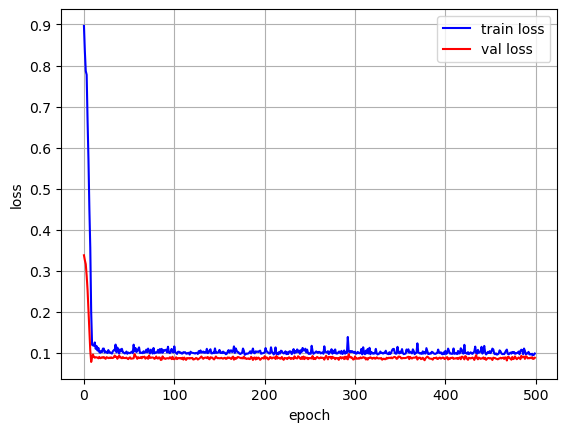

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [31]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(8, 0.0785239078104496)

In [32]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [33]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
np.array(trues_list).shape, np.array(preds_list).shape

((623, 1, 1), (623, 1, 1))

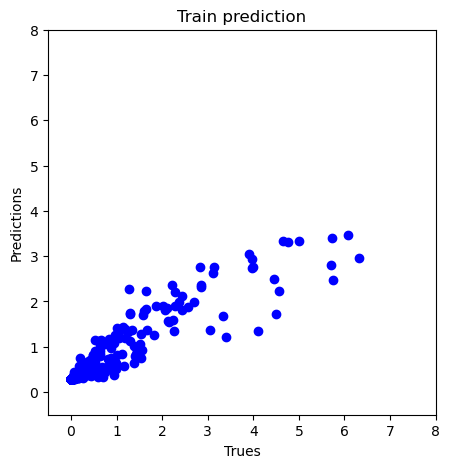

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

In [36]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155


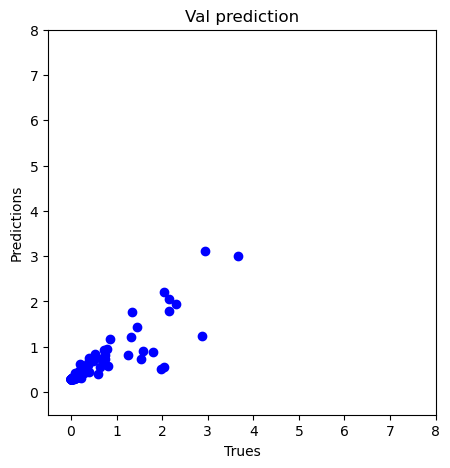

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

## Test prediction

In [38]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(data_dir + "train_np.npy")
test_np = np.load(data_dir + "test_np.npy")

In [39]:
train_np.shape, test_np.shape

((780, 4), (260, 4))

In [40]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [41]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 2), (260, 1), (260,))

In [43]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

In [44]:
test_all_np.shape

(260, 4)

In [45]:
test_np[:,-1].shape, test_scaled_ts.shape, test_scaled_ys.shape, test_np.shape

((260,), (260,), (260, 2), (260, 4))

### 1. Prediction based on results from 40 days ago

In [46]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [47]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [48]:
test_Xs.shape, test_ys.shape

((259, 1, 4), (259, 1, 4))

In [49]:
tst_xs_tensor = torch.Tensor(test_Xs[:,:,0:1])
tst_ys_tensor = torch.Tensor(test_ys[:,:,0:1])

In [50]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [51]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


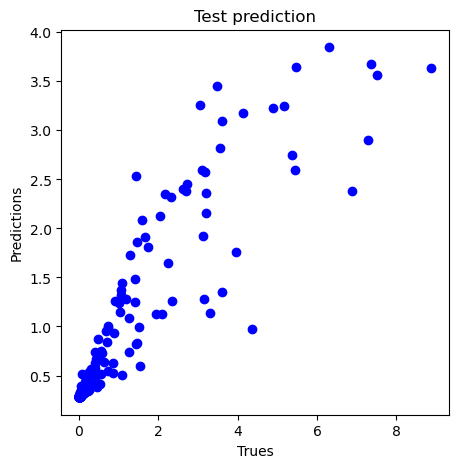

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [53]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [54]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

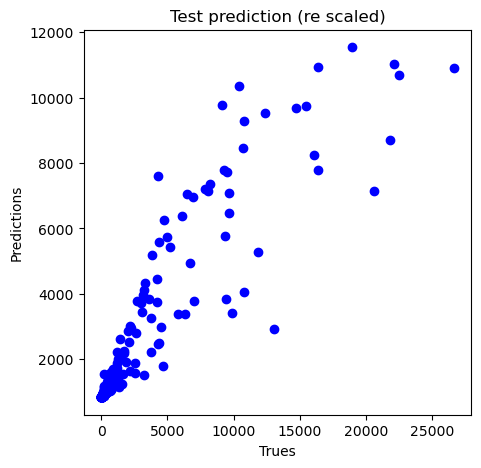

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [56]:
tst_preds.shape

(259, 1)

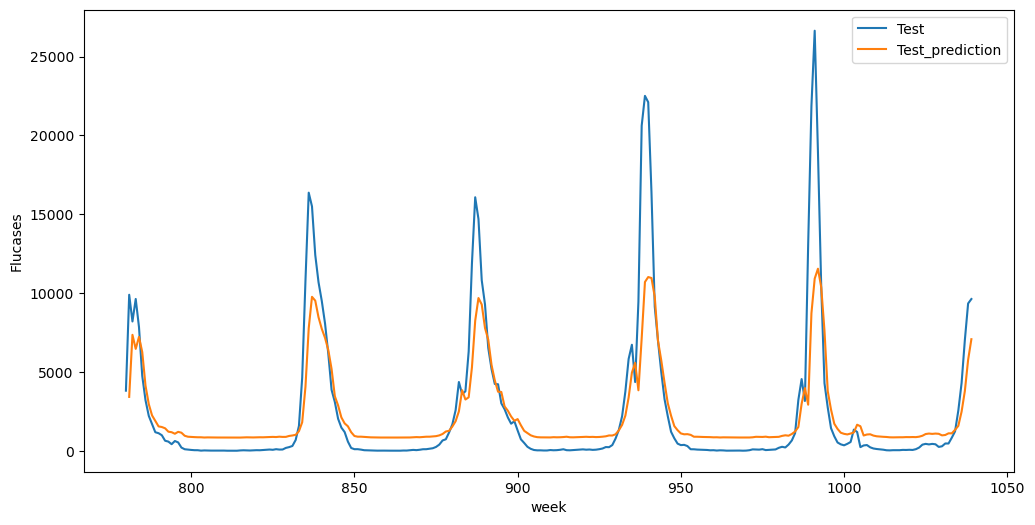

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps[seq_length:], tst_preds,label="Test_prediction")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()

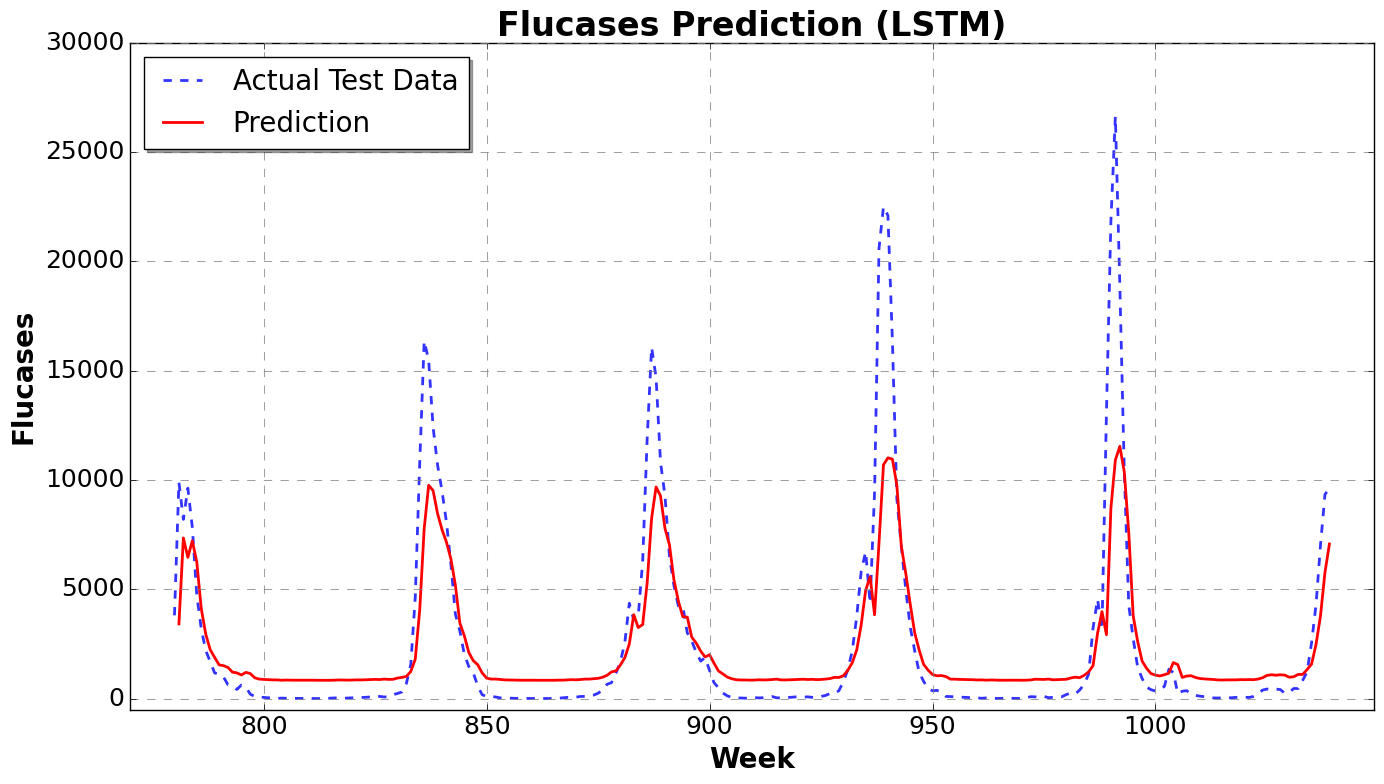

In [58]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Flucases Prediction (LSTM)", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [60]:
reg_metric(test_np[seq_length*2:,0], tst_preds[seq_length:,0], "Flucases")

Flucases
MSE : 6226253.842845814.
RMSE : 2495.2462489393333.
MAE : 1327.5221917204155.
R2 : 0.7001111502504653.
pearson : 0.9141038933038753 2.3782638977187055e-102


In [61]:
reg_metric(test_np[seq_length*52:,0], tst_preds[seq_length*51:,0], "Flucases")

Flucases
MSE : 7522680.055238696.
RMSE : 2742.7504544232047.
MAE : 1445.4088302025427.
R2 : 0.6880275741288526.
pearson : 0.9129049097095285 4.1438512669448205e-82
